In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [2]:
# Simulation Parameters
DATASET_PATH='../Dataset/'
TRUE_NEWS_DATASET = DATASET_PATH + 'True.csv'
FAKE_NEWS_DATASET= DATASET_PATH + 'Fake.csv'
WEL_FAKE_DATASET=DATASET_PATH +'WELFake_Dataset.csv'

In [3]:
#load Data

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

### Pré Avaliação Datasets

In [4]:
fake_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Text(0.5, 1.0, 'Fake news distribution per Subject')

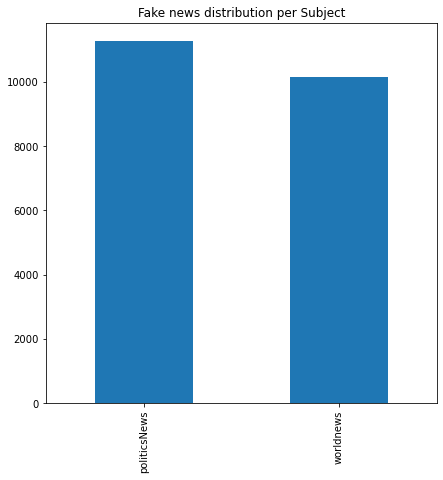

In [5]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [6]:
true_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Text(0.5, 1.0, 'True news distribution per Subject')

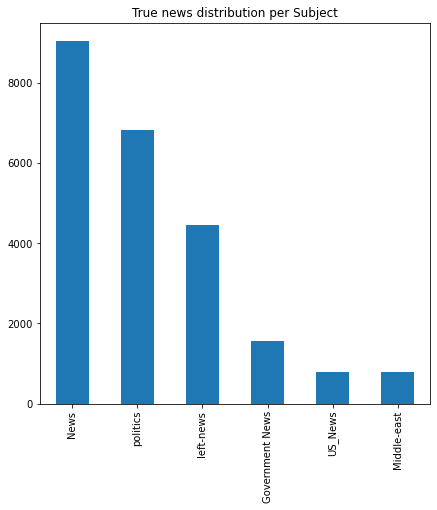

In [7]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

#### WelNews

Vamos considerar só relevante o titulo e o texto relativo as noticias

In [8]:
## merge
true_news_df['label'] = 0
true_news_df_rev= true_news_df[['title','text','label']].copy()

fake_news_df['label'] = 1
fake_news_df_rev= fake_news_df[['title','text','label']].copy()


news_df = pd.concat([true_news_df_rev, fake_news_df_rev], axis=0)



In [9]:
#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [10]:
news_df

,title,text,label
0,Gunfire heard in Eritrea's capital as protests...,NAIROBI (Reuters) - The U.S. embassy in Eritre...,1
1,Stephen Colbert Explains The Horrifying Futur...,"With only three clowns left in GOP clown car, ...",0
2,Will Hillary Clinton Return The Artifacts She ...,What the heck! Hillary and Bill really are the...,0
3,Donald Trump & Hillary Clinton: Defensive Real...,21st Century Wire says How will Trump and Hill...,0
4,Bette Midler Just Ruined Trump’s Day With A B...,Donald Trump has a cocaine problem. As Howard ...,0
...,...,...,...
44893,U.S. says North Korea's nuclear ambitions on t...,WASHINGTON (Reuters) - The United States plans...,1
44894,Panama to send immigration envoys to China as ...,PANAMA CITY (Reuters) - Panama s government wi...,1
44895,IT BEGINS….OBAMA APPOINTED JUDGE Rules Trump U...,Chicago style politics buckle up America Barry...,0
44896,"Former Pastor Turned Teacher Beat Students, T...","On May 20, Rocky Walker, a former pastor who t...",0


In [11]:

#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True).iloc[:10001]

In [12]:
#save dataset
news_df.to_csv(DATASET_PATH + 'news_dataset.csv')

## Data Preprocessing

In [13]:
def remove_especial_chars(text):

  return re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

### Removendo caracteres Especiais

In [14]:
#removing especial charactercts

news_df_preprocessed = news_df.copy()
news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(remove_especial_chars)
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(remove_especial_chars)

#conver every character to lower case to not confusing model

news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(lambda text: text.lower())
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(lambda text: text.lower())


In [15]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#tokenizing
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title'].apply(nltk.word_tokenize)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['text'].apply(nltk.word_tokenize)

In [17]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,obama says asean summit discussed need to lowe...,rancho mirage calif reuters u s preside...,1,"[obama, says, asean, summit, discussed, need, ...","[rancho, mirage, calif, reuters, u, s, preside..."
1,europe africa ministers agree to help migrant...,bern reuters european and african minister...,1,"[europe, africa, ministers, agree, to, help, m...","[bern, reuters, european, and, african, minist..."
2,boom wikileaks shows hillary speech to banker...,no wonder she didn t want anyone to see her sp...,0,"[boom, wikileaks, shows, hillary, speech, to, ...","[no, wonder, she, didn, t, want, anyone, to, s..."
3,unbelievable vintage video exposes racist fir...,this is an old video that exposes so much abou...,0,"[unbelievable, vintage, video, exposes, racist...","[this, is, an, old, video, that, exposes, so, ..."
4,michigan city with first muslim majority city ...,it s good to know that illegal aliens potenti...,0,"[michigan, city, with, first, muslim, majority...","[it, s, good, to, know, that, illegal, aliens,..."
...,...,...,...,...,...
9996,watch out rinos and democrats the 7 senate se...,we can t wait for next year s midterm election...,0,"[watch, out, rinos, and, democrats, the, 7, se...","[we, can, t, wait, for, next, year, s, midterm..."
9997,south africa s opposition asks court to force ...,johannesburg reuters south africa s main o...,1,"[south, africa, s, opposition, asks, court, to...","[johannesburg, reuters, south, africa, s, main..."
9998,u s withdraws funding for u n population fund,united nations reuters the state departmen...,1,"[u, s, withdraws, funding, for, u, n, populati...","[united, nations, reuters, the, state, departm..."
9999,obama s illegals to get retro tax credits for ...,no need to file rules don t apply to obama s a...,0,"[obama, s, illegals, to, get, retro, tax, cred...","[no, need, to, file, rules, don, t, apply, to,..."


In [18]:
#stopping work elimination

from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

def eliminate_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]


#eliminate stop words
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,obama says asean summit discussed need to lowe...,rancho mirage calif reuters u s preside...,1,"[obama, says, asean, summit, discussed, need, ...","[obama, says, asean, summit, discussed, need, ..."
1,europe africa ministers agree to help migrant...,bern reuters european and african minister...,1,"[europe, africa, ministers, agree, help, migra...","[europe, africa, ministers, agree, help, migra..."
2,boom wikileaks shows hillary speech to banker...,no wonder she didn t want anyone to see her sp...,0,"[boom, wikileaks, shows, hillary, speech, bank...","[boom, wikileaks, shows, hillary, speech, bank..."
3,unbelievable vintage video exposes racist fir...,this is an old video that exposes so much abou...,0,"[unbelievable, vintage, video, exposes, racist...","[unbelievable, vintage, video, exposes, racist..."
4,michigan city with first muslim majority city ...,it s good to know that illegal aliens potenti...,0,"[michigan, city, first, muslim, majority, city...","[michigan, city, first, muslim, majority, city..."
...,...,...,...,...,...
9996,watch out rinos and democrats the 7 senate se...,we can t wait for next year s midterm election...,0,"[watch, rinos, democrats, 7, senate, seats, li...","[watch, rinos, democrats, 7, senate, seats, li..."
9997,south africa s opposition asks court to force ...,johannesburg reuters south africa s main o...,1,"[south, africa, opposition, asks, court, force...","[south, africa, opposition, asks, court, force..."
9998,u s withdraws funding for u n population fund,united nations reuters the state departmen...,1,"[u, withdraws, funding, u, n, population, fund]","[u, withdraws, funding, u, n, population, fund]"
9999,obama s illegals to get retro tax credits for ...,no need to file rules don t apply to obama s a...,0,"[obama, illegals, get, retro, tax, credits, ti...","[obama, illegals, get, retro, tax, credits, ti..."


In [20]:
nltk.download('rslp')
def steam_text(tokens):
  stemmer = nltk.stem.RSLPStemmer()
  return  [stemmer.stem(word) for word in tokens]

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [21]:
#stemming tokens
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)

In [22]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,obama says asean summit discussed need to lowe...,rancho mirage calif reuters u s preside...,1,"[obam, say, asean, summit, discussed, need, lo...","[ob, say, asean, summit, discussed, need, low,..."
1,europe africa ministers agree to help migrant...,bern reuters european and african minister...,1,"[europ, afric, minist, agre, help, migrant, he...","[europ, afric, minist, agr, help, migrant, hel..."
2,boom wikileaks shows hillary speech to banker...,no wonder she didn t want anyone to see her sp...,0,"[boom, wikileak, show, hillary, speech, bank, ...","[boom, wikileak, show, hillary, speech, bank, ..."
3,unbelievable vintage video exposes racist fir...,this is an old video that exposes so much abou...,0,"[unbelievabl, vintag, vide, expos, racist, fir...","[unbelievabl, vintag, vid, exp, racist, first,..."
4,michigan city with first muslim majority city ...,it s good to know that illegal aliens potenti...,0,"[michigan, city, first, muslim, majority, city...","[michigan, city, first, muslim, majority, city..."
...,...,...,...,...,...
9996,watch out rinos and democrats the 7 senate se...,we can t wait for next year s midterm election...,0,"[watch, rin, democrat, 7, senat, seat, likely,...","[watch, rin, democrat, 7, senat, seat, likely,..."
9997,south africa s opposition asks court to force ...,johannesburg reuters south africa s main o...,1,"[south, afric, opposition, ask, court, forc, d...","[south, afric, opposition, ask, court, forc, d..."
9998,u s withdraws funding for u n population fund,united nations reuters the state departmen...,1,"[u, withdraw, funding, u, n, population, fund]","[u, withdraw, funding, u, n, population, fund]"
9999,obama s illegals to get retro tax credits for ...,no need to file rules don t apply to obama s a...,0,"[obam, illeg, get, retr, tax, credit, tim, wor...","[ob, illeg, get, retr, tax, credit, tim, worke..."


In [23]:
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count()

In [24]:
# Train Word2Vec model for text column
text_corpus  = news_df_preprocessed['text_tokens'].tolist()
model_for_text =  Word2Vec(sentences=text_corpus, window=5, min_count=1, workers=4)

In [25]:
text_vocab_size = len(model_for_text.wv.index_to_key)
print(f'Tamanho vocabulario Texto: {text_vocab_size}')


Tamanho vocabulario Texto: 9936


In [26]:
# Train Word2Vec model for title column
title_corpus = news_df_preprocessed['title_tokens'].tolist()
model_for_title = Word2Vec(sentences=title_corpus, window=5, min_count=1, workers=4)

In [27]:
title_vocab_size = len(model_for_title.wv.index_to_key)
print(f'Tamanho vocabulario Título: {title_vocab_size}')

Tamanho vocabulario Título: 10159


In [28]:
def get_vectors_from_text(tokens):

  return [model_for_text.wv[word] for word in tokens]



def get_vectors_from_title(tokens):

  return [model_for_title.wv[word] for word in tokens]




In [29]:
# Word2Vector
news_df_preprocessed['text_vectors'] = news_df_preprocessed['text_tokens'].apply(get_vectors_from_text)
news_df_preprocessed['title_vectors']  = news_df_preprocessed['title_tokens'].apply(get_vectors_from_title)


In [30]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens,text_vectors,title_vectors
0,obama says asean summit discussed need to lowe...,rancho mirage calif reuters u s preside...,1,"[obam, say, asean, summit, discussed, need, lo...","[ob, say, asean, summit, discussed, need, low,...","[[-0.9248566, 0.7367641, 0.35212752, 0.2681276...","[[-0.26068687, 0.97639656, -0.08459612, 0.2452..."
1,europe africa ministers agree to help migrant...,bern reuters european and african minister...,1,"[europ, afric, minist, agre, help, migrant, he...","[europ, afric, minist, agr, help, migrant, hel...","[[-0.14940715, 0.12252249, 0.057810377, 0.0524...","[[-0.039594207, 0.16169786, -0.017157149, 0.03..."
2,boom wikileaks shows hillary speech to banker...,no wonder she didn t want anyone to see her sp...,0,"[boom, wikileak, show, hillary, speech, bank, ...","[boom, wikileak, show, hillary, speech, bank, ...","[[-0.23865736, 0.17278664, 0.09183704, 0.06476...","[[-0.0643093, 0.2332397, -0.009692068, 0.05220..."
3,unbelievable vintage video exposes racist fir...,this is an old video that exposes so much abou...,0,"[unbelievabl, vintag, vide, expos, racist, fir...","[unbelievabl, vintag, vid, exp, racist, first,...","[[-0.06611673, 0.054856945, 0.028277518, 0.027...","[[-0.026117614, 0.06921273, -0.006598106, 0.01..."
4,michigan city with first muslim majority city ...,it s good to know that illegal aliens potenti...,0,"[michigan, city, first, muslim, majority, city...","[michigan, city, first, muslim, majority, city...","[[-0.1688676, 0.14859469, 0.08008578, 0.043261...","[[-0.03721487, 0.16055879, -0.008836343, 0.033..."
...,...,...,...,...,...,...,...
9996,watch out rinos and democrats the 7 senate se...,we can t wait for next year s midterm election...,0,"[watch, rin, democrat, 7, senat, seat, likely,...","[watch, rin, democrat, 7, senat, seat, likely,...","[[-0.8336049, 0.64453673, 0.31344676, 0.256294...","[[-0.21832913, 0.82789665, -0.08225961, 0.2260..."
9997,south africa s opposition asks court to force ...,johannesburg reuters south africa s main o...,1,"[south, afric, opposition, ask, court, forc, d...","[south, afric, opposition, ask, court, forc, d...","[[-0.4844307, 0.3102755, 0.24649705, 0.1379509...","[[-0.13400534, 0.53036255, -0.0059755277, 0.12..."
9998,u s withdraws funding for u n population fund,united nations reuters the state departmen...,1,"[u, withdraw, funding, u, n, population, fund]","[u, withdraw, funding, u, n, population, fund]","[[-0.88461965, 0.66539484, 0.36381418, 0.21415...","[[-0.21545905, 0.96073186, -0.029243575, 0.191..."
9999,obama s illegals to get retro tax credits for ...,no need to file rules don t apply to obama s a...,0,"[obam, illeg, get, retr, tax, credit, tim, wor...","[ob, illeg, get, retr, tax, credit, tim, worke...","[[-0.9248566, 0.7367641, 0.35212752, 0.2681276...","[[-0.26068687, 0.97639656, -0.08459612, 0.2452..."


In [31]:
news_df_preprocessed['text_tokens'].apply(lambda x: len(x))


0        11
1         8
2        18
3        18
4        13
         ..
9996      8
9997     10
9998      7
9999     12
10000    10
Name: text_tokens, Length: 10001, dtype: int64

## Modelagem

In [32]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import plot_model


### Modeling for title

In [33]:
#  the model for the title
VO_SIZE=500
EMBEDDING_VECTOR_FEATURE_TITLE=50
text_sentences = len(news_df_preprocessed['text_tokens'])
model_title = Sequential()
model_title.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TITLE, name='title_embedding'))
model_title.add(LSTM(100))
model_title.add( Dense(1, activation='sigmoid'))
model_title.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_title.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         25000     
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 85,501
Trainable params: 85,501
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

title_sent_length = 20
title_sentences = [' '.join(words) for words in news_df_preprocessed['title_tokens']]
onehot_rep = [one_hot(words, VO_SIZE) for words in title_sentences]
embedded_doc = pad_sequences(onehot_rep, padding='pre', maxlen=title_sent_length)


In [35]:
embedded_doc.shape


(10001, 20)

In [90]:
from sklearn.model_selection import train_test_split

SEED=101
X_title = np.array(embedded_doc)
y = np.array(news_df_preprocessed['label'])

X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title, y, train_size=0.8, random_state=SEED)

In [37]:


history_title = model_title.fit(X_title_train, y_title_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)




Epoch 1/40


200/200 [==============================] - 8s 26ms/step - loss: 0.4158 - accuracy: 0.8122 - val_loss: 0.3499 - val_accuracy: 0.8344
Epoch 2/40
200/200 [==============================] - 4s 19ms/step - loss: 0.2853 - accuracy: 0.8802 - val_loss: 0.3824 - val_accuracy: 0.8431
Epoch 3/40
200/200 [==============================] - 5s 26ms/step - loss: 0.2537 - accuracy: 0.8888 - val_loss: 0.3314 - val_accuracy: 0.8444
Epoch 4/40
200/200 [==============================] - 4s 20ms/step - loss: 0.2289 - accuracy: 0.9053 - val_loss: 0.3396 - val_accuracy: 0.8537
Epoch 5/40
200/200 [==============================] - 4s 21ms/step - loss: 0.2176 - accuracy: 0.9045 - val_loss: 0.3407 - val_accuracy: 0.8544
Epoch 6/40
200/200 [==============================] - 4s 19ms/step - loss: 0.1981 - accuracy: 0.9159 - val_loss: 0.3670 - val_accuracy: 0.8581
Epoch 7/40
200/200 [==============================] - 3s 17ms/step - loss: 0.1901 - accuracy: 0.9181 - val_loss: 0.3790 - val_accuracy: 0.8569
Epoch 8/40

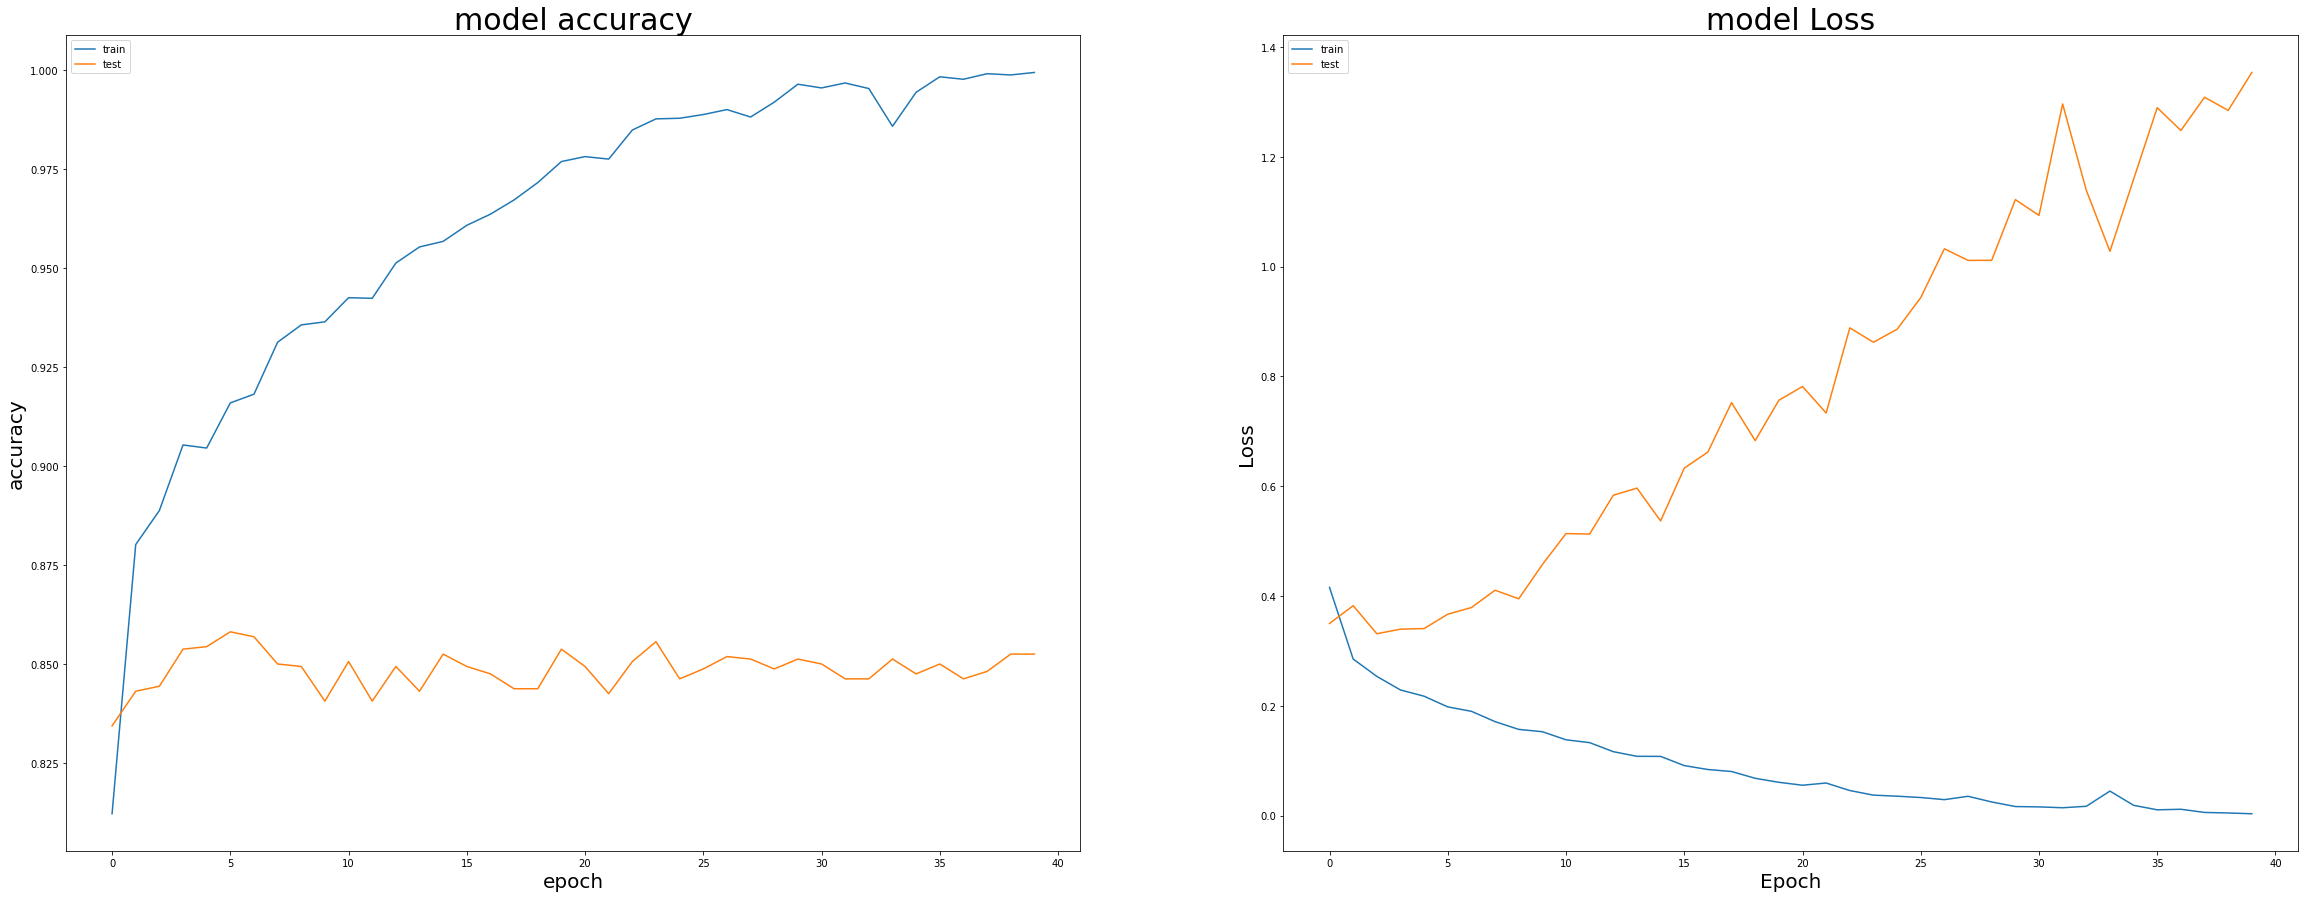

In [96]:
FONT_SIZE=20
TITLE_SIZE=30


fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title.history['accuracy'])
axs[0].plot(history_title.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title.history['loss'])
axs[1].plot(history_title.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### more sofisticated model

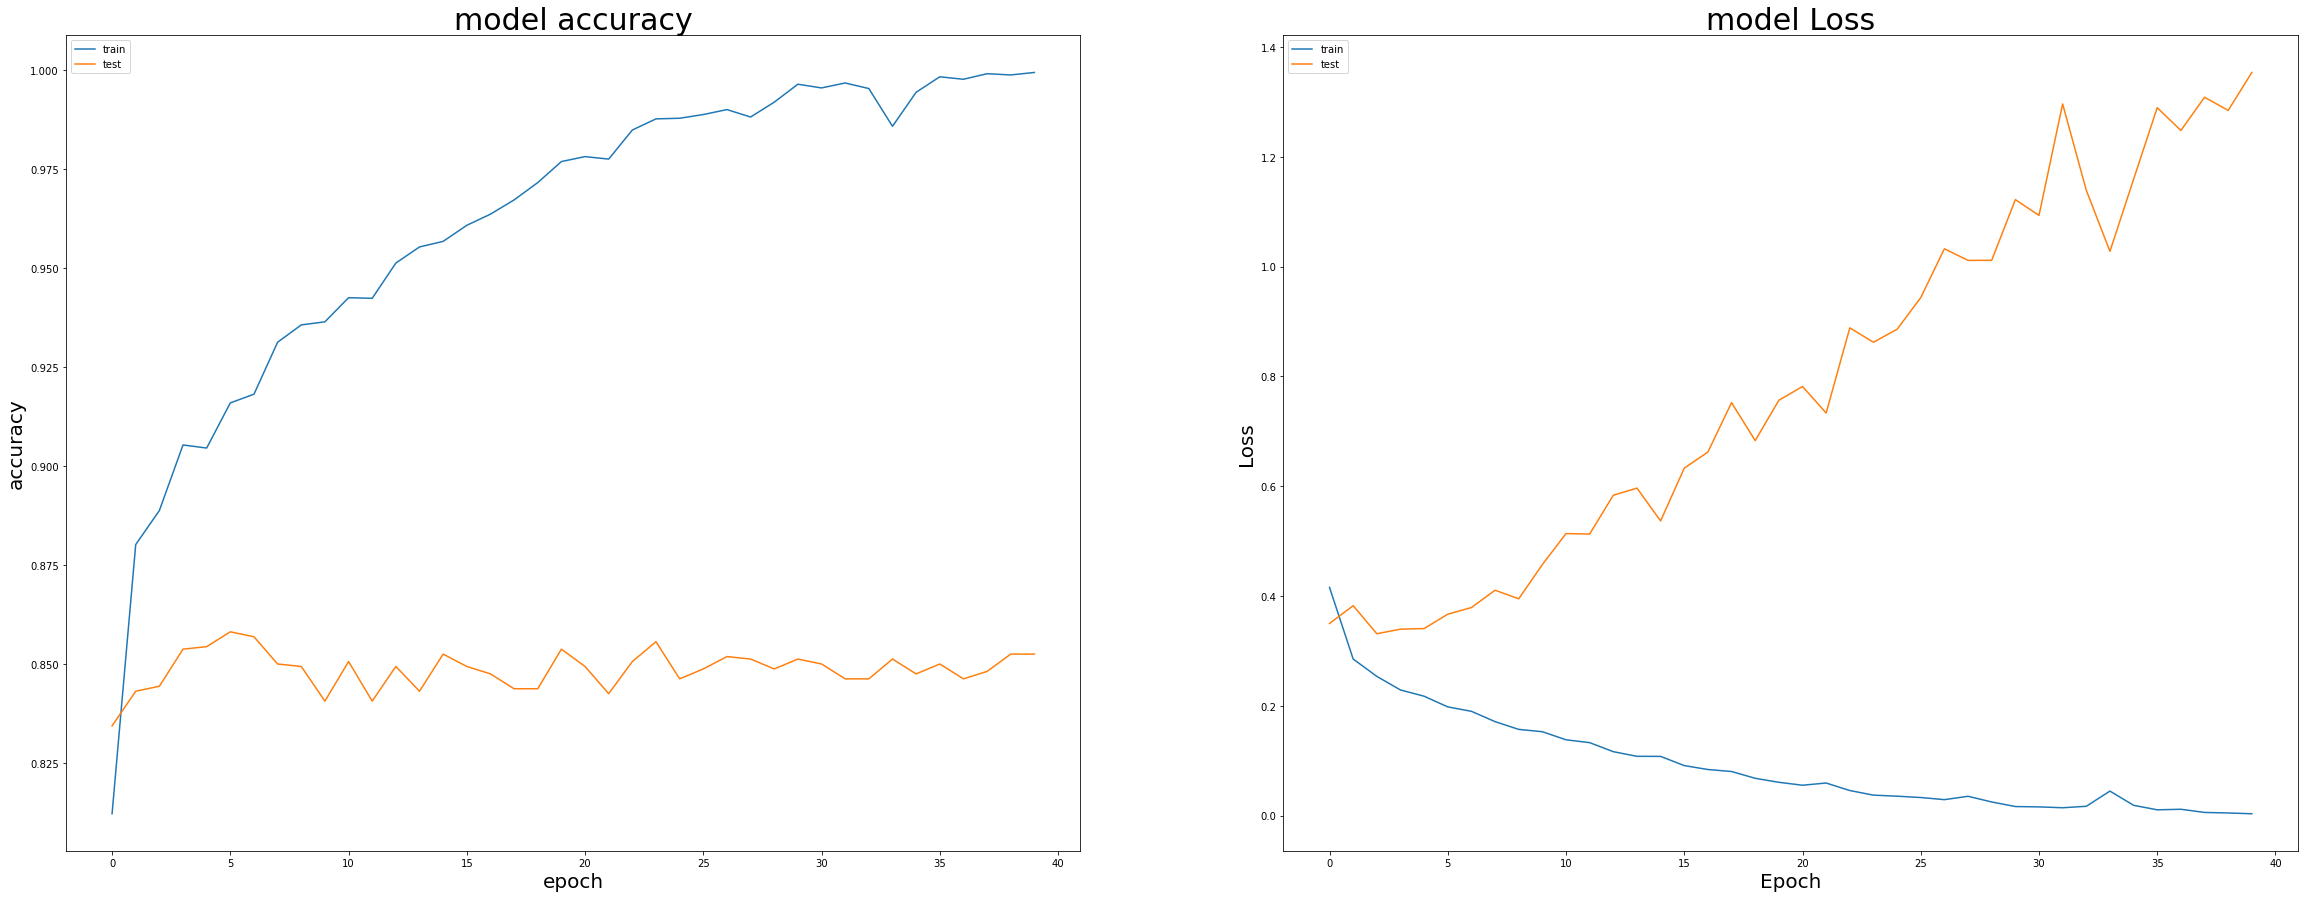

In [38]:


fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title.history['accuracy'])
axs[0].plot(history_title.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title.history['loss'])
axs[1].plot(history_title.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')


#### with simpler model

In [92]:
N_DIM = 100
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim= title_sent_length))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_simpler_history = model_ohp_simpler.fit(X_title_train, y_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 1s 4ms/step - loss: 14.9457 - accuracy: 0.6112 - val_loss: 4.8339 - val_accuracy: 0.6500
Epoch 2/40
200/200 [==============================] - 1s 3ms/step - loss: 3.8538 - accuracy: 0.6342 - val_loss: 2.5084 - val_accuracy: 0.6700
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 2.5888 - accuracy: 0.6383 - val_loss: 2.0572 - val_accuracy: 0.6531
Epoch 4/40
200/200 [==============================] - 1s 3ms/step - loss: 2.1016 - accuracy: 0.6469 - val_loss: 1.8267 - val_accuracy: 0.6194
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 1.8924 - accuracy: 0.6459 - val_loss: 1.8866 - val_accuracy: 0.6475
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 1.7095 - accuracy: 0.6498 - val_loss: 1.3945 - val_accuracy: 0.6850
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 1.6201 - accuracy: 0.6539 - val_loss: 1.6067 - val_accuracy: 0.5931
Epoch

Text(0.5, 0, 'Epoch')

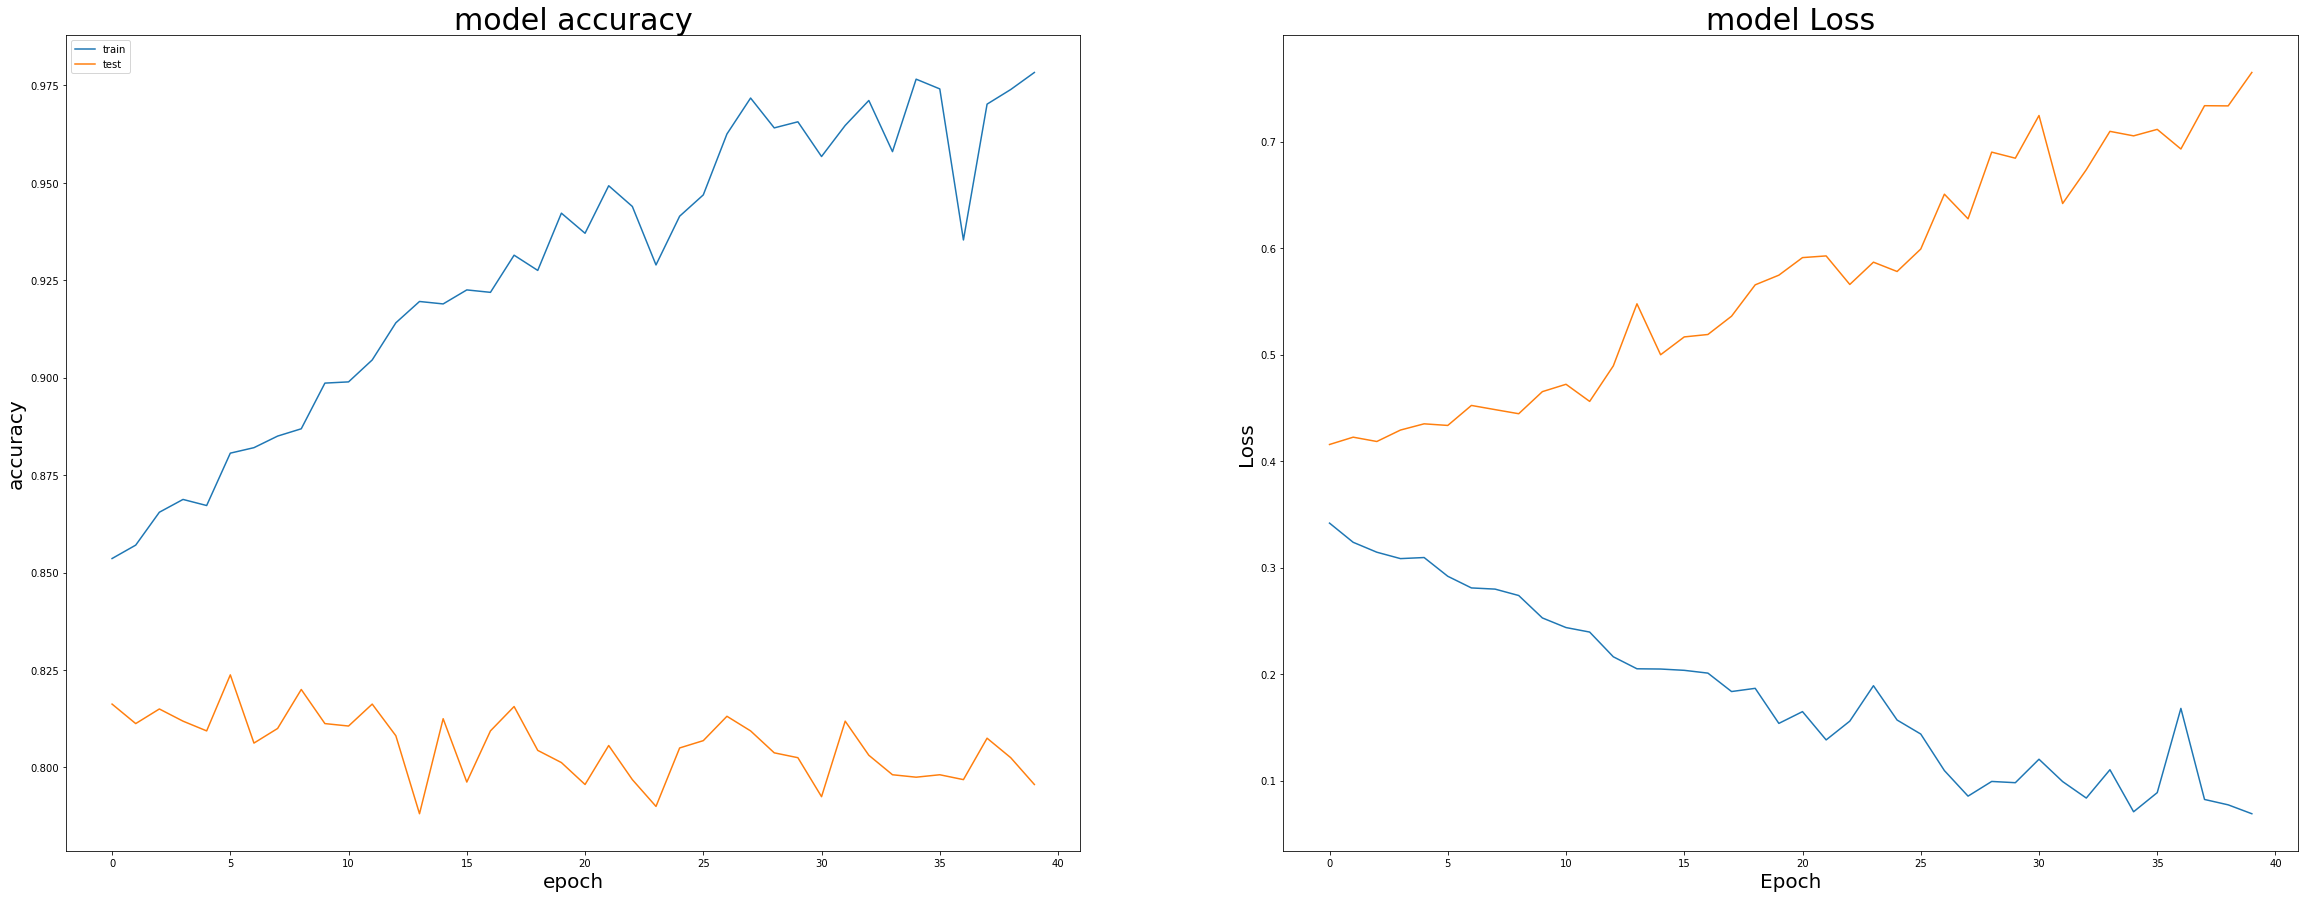

In [94]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title_w2v.history['accuracy'])
axs[0].plot(history_title_w2v.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title_w2v.history['loss'])
axs[1].plot(history_title_w2v.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Vectorizer codification

In [40]:
#  the model for the title


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument

import gensim

In [42]:
#turn setences into labeled setences

def labelizeTweets(tweets, label_type):
    labelized = []
    LabeledSentence = TaggedDocument
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized



In [68]:
X_title_tokens = np.array(news_df_preprocessed['title_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title_tokens, y, train_size=0.8, random_state=SEED)

In [71]:
X_train = labelizeTweets(X_title_train, 'TRAIN')
X_test = labelizeTweets(X_title_test, 'TEST')
train_words = [x.words for x in tqdm(X_train)]

8000it [00:00, 368155.54it/s]
2001it [00:00, 478904.55it/s]
100%|██████████| 8000/8000 [00:00<00:00, 1130768.75it/s]


In [72]:
#build word vocab and vectorization
N_DIM = 100
train_words = [x.words for x in tqdm(X_train)]
news_w2v = Word2Vec(vector_size=N_DIM, min_count=10,window=5, workers=4)
news_w2v.build_vocab(train_words)
news_w2v.train(train_words, total_words=news_w2v.corpus_total_words, epochs=50)

(2549754, 3826250)

In [73]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [74]:
def buildWordVector(tokens, size, w2v):
   
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            if type(word) != str:
                for subword in word:
                    vec += w2v.wv[subword].reshape((1, size)) * tfidf[subword]
                    count += 1.
            else:        
                vec += w2v.wv[word].reshape((1, size)) * tfidf[word]
                count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec


In [75]:
from sklearn.preprocessing import scale

train_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v = scale(test_vecs_w2v)

8000it [00:00, 9258.14it/s]
2001it [00:00, 9944.86it/s]


In [58]:
train_vecs_w2v

array([[-0.03142989, -0.95085711,  0.98474381, ...,  1.08572871,
         1.45683938, -0.01631086],
       [-1.08622226, -0.69421255, -1.15428587, ...,  0.19241982,
         2.59005853, -0.67943456],
       [ 0.72223624,  0.24187911,  0.35493298, ...,  1.53395743,
        -0.94463054, -1.67461646],
       ...,
       [ 0.39927669, -0.88606137, -0.24544673, ..., -0.38304237,
        -0.22535987,  0.17669296],
       [-2.87168497,  0.67439485, -1.99991795, ...,  2.28475002,
        -2.68043666, -2.37146503],
       [ 1.25968973,  1.18801265,  1.58557741, ...,  0.38028034,
        -0.21194625,  0.87132619]])

In [ ]:
embedded_doc

array([[  0,   0,   0, ..., 116, 264, 162],
       [  0,   0,   0, ..., 485, 449, 273],
       [  0,   0,   0, ..., 161,  33, 479],
       ...,
       [  0,   0,   0, ..., 474, 132, 211],
       [  0,   0,   0, ..., 230,  44, 380],
       [  0,   0,   0, ..., 443, 100, 184]])

In [76]:
vocab = news_w2v.wv.key_to_index
VO_SIZE= len(list(vocab.keys()))
VO_GAP=50

In [77]:

EMBEDDING_VECTOR_FEATURE_TITLE= 50
model_title_w2v = Sequential()
model_title_w2v.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TITLE, name='title_embedding'))
model_title_w2v.add(LSTM(100))
model_title_w2v.add( Dense(1, activation='sigmoid'))
model_title_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_title_w2v.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         77700     
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 138,201
Trainable params: 138,201
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
y_title_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [85]:
train_vecs_w2v2 = np.array([ np.int64(v + VO_SIZE - VO_GAP) for v in train_vecs_w2v])

history_title_w2v = model_title_w2v.fit(train_vecs_w2v2, y_title_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 23s 115ms/step - loss: 0.3418 - accuracy: 0.8536 - val_loss: 0.4156 - val_accuracy: 0.8163
Epoch 2/40
200/200 [==============================] - 20s 100ms/step - loss: 0.3238 - accuracy: 0.8570 - val_loss: 0.4224 - val_accuracy: 0.8112
Epoch 3/40
200/200 [==============================] - 19s 97ms/step - loss: 0.3144 - accuracy: 0.8655 - val_loss: 0.4184 - val_accuracy: 0.8150
Epoch 4/40
200/200 [==============================] - 20s 100ms/step - loss: 0.3084 - accuracy: 0.8687 - val_loss: 0.4291 - val_accuracy: 0.8119
Epoch 5/40
200/200 [==============================] - 20s 98ms/step - loss: 0.3094 - accuracy: 0.8672 - val_loss: 0.4350 - val_accuracy: 0.8094
Epoch 6/40
200/200 [==============================] - 18s 92ms/step - loss: 0.2919 - accuracy: 0.8806 - val_loss: 0.4335 - val_accuracy: 0.8238
Epoch 7/40
200/200 [==============================] - 20s 99ms/step - loss: 0.2809 - accuracy: 0.8820 - val_loss: 0.4522 - val_accura

Text(0.5, 0, 'Epoch')

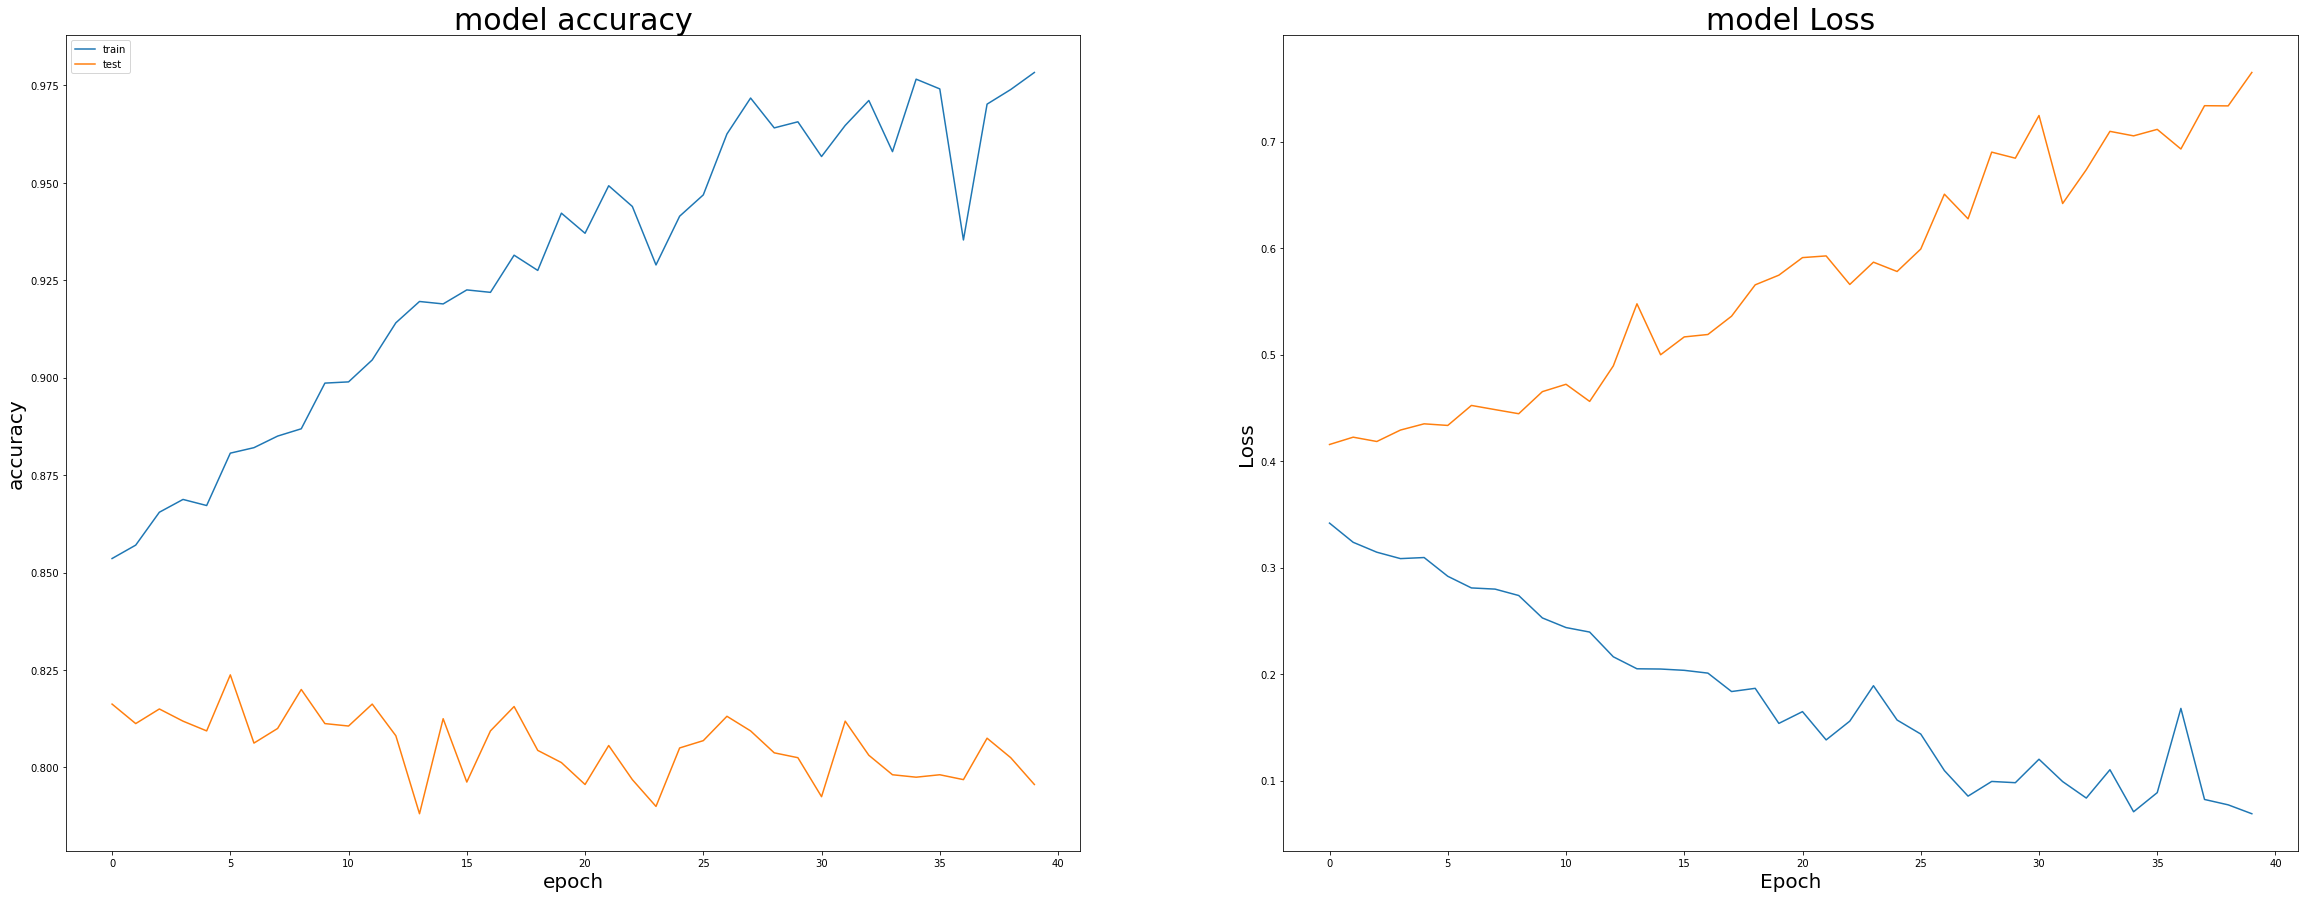

In [86]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title_w2v.history['accuracy'])
axs[0].plot(history_title_w2v.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title_w2v.history['loss'])
axs[1].plot(history_title_w2v.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Testando um modelo mais simples

In [83]:
model_w2v_simpler = Sequential()
model_w2v_simpler.add(Dense(32, activation='relu', input_dim=N_DIM))
model_w2v_simpler.add(Dense(1, activation='sigmoid'))
model_w2v_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_simpler_history = model_w2v_simpler.fit(train_vecs_w2v, y_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 2s 4ms/step - loss: 0.3367 - accuracy: 0.8589 - val_loss: 0.2910 - val_accuracy: 0.8844
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9005 - val_loss: 0.2760 - val_accuracy: 0.8906
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2409 - accuracy: 0.9053 - val_loss: 0.2700 - val_accuracy: 0.8931
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9089 - val_loss: 0.2648 - val_accuracy: 0.8913
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.9144 - val_loss: 0.2650 - val_accuracy: 0.8925
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9167 - val_loss: 0.2582 - val_accuracy: 0.8988
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2073 - accuracy: 0.9194 - val_loss: 0.2582 - val_accuracy: 0.8963
Epoch 

Text(0.5, 0, 'Epoch')

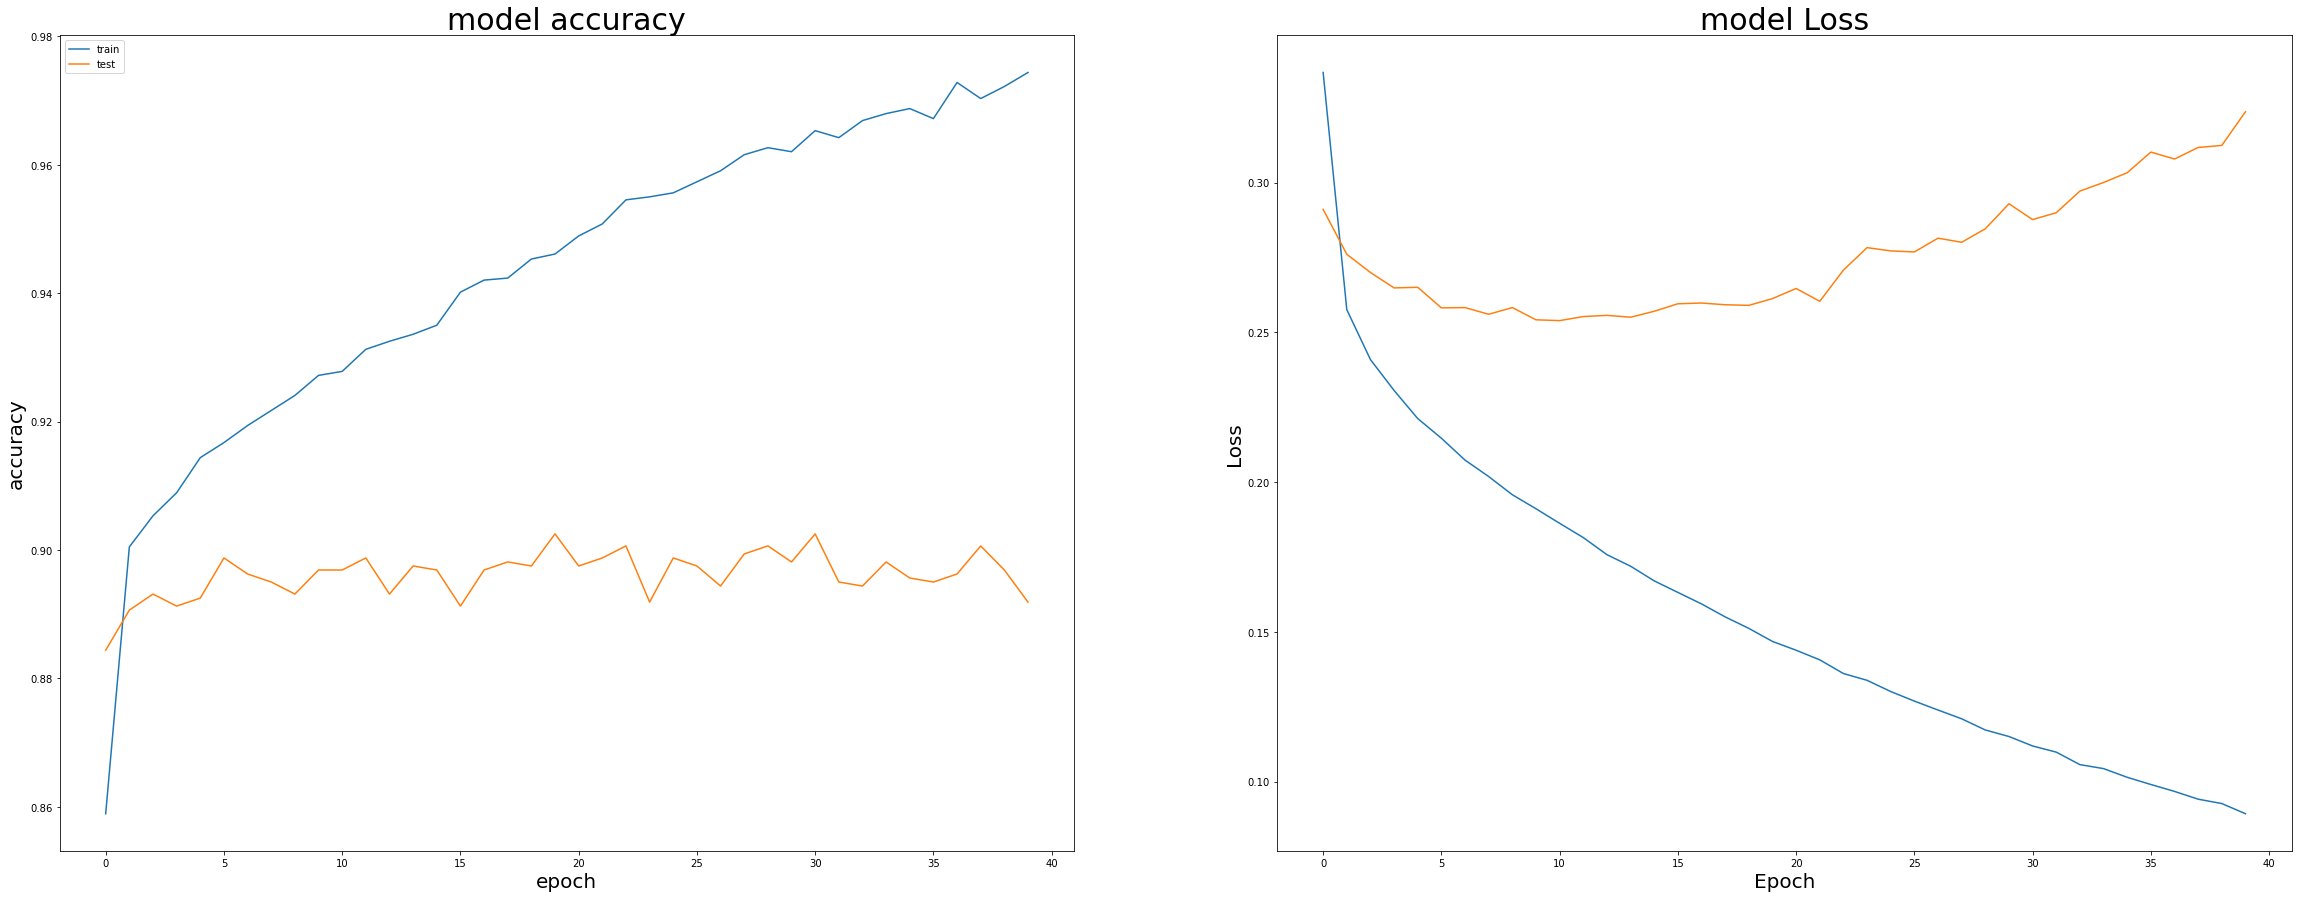

In [84]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_w2v_simpler_history.history['accuracy'])
axs[0].plot(model_w2v_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_w2v_simpler_history.history['loss'])
axs[1].plot(model_w2v_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Modeling for Text

#### With padding + onehot enconding

### The sofisticated model

In [97]:
VO_SIZE=1000
EMBEDDING_VECTOR_FEATURE_TEXT=100
model_text = Sequential()
model_text.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TEXT, name='text_embedding'))
model_text.add(LSTM(100))
model_text.add( Dense(1, activation='sigmoid'))
model_text.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_text.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_embedding (Embedding)  (None, None, 100)         100000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
text_sent_length = 30
text_sentences = [' '.join(words) for words in news_df_preprocessed['text_tokens']]
onehot_rep = [one_hot(words, VO_SIZE) for words in title_sentences]
embedded_doc = pad_sequences(onehot_rep, padding='pre', maxlen=text_sent_length)

In [109]:
SEED=101
X_text = np.array(embedded_doc)
y = np.array(news_df_preprocessed['label'])

X_text_train, X_text_test, y_text_train , y_text_test = train_test_split(X_text, y, train_size=0.8, random_state=SEED)

In [110]:
history_text = model_text.fit(X_text_train, y_text_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)


Epoch 1/40
200/200 [==============================] - 11s 46ms/step - loss: 0.0764 - accuracy: 0.9777 - val_loss: 0.7650 - val_accuracy: 0.8644
Epoch 2/40
200/200 [==============================] - 5s 27ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.8310 - val_accuracy: 0.8656
Epoch 3/40
200/200 [==============================] - 6s 31ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.9131 - val_accuracy: 0.8669
Epoch 4/40
200/200 [==============================] - 6s 31ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.9244 - val_accuracy: 0.8675
Epoch 5/40
200/200 [==============================] - 6s 31ms/step - loss: 8.5370e-04 - accuracy: 1.0000 - val_loss: 0.9714 - val_accuracy: 0.8687
Epoch 6/40
200/200 [==============================] - 7s 33ms/step - loss: 5.1725e-04 - accuracy: 1.0000 - val_loss: 0.9944 - val_accuracy: 0.8687
Epoch 7/40
200/200 [==============================] - 6s 32ms/step - loss: 3.7344e-04 - accuracy: 1.0000 - val_loss: 1.0165 - val_acc

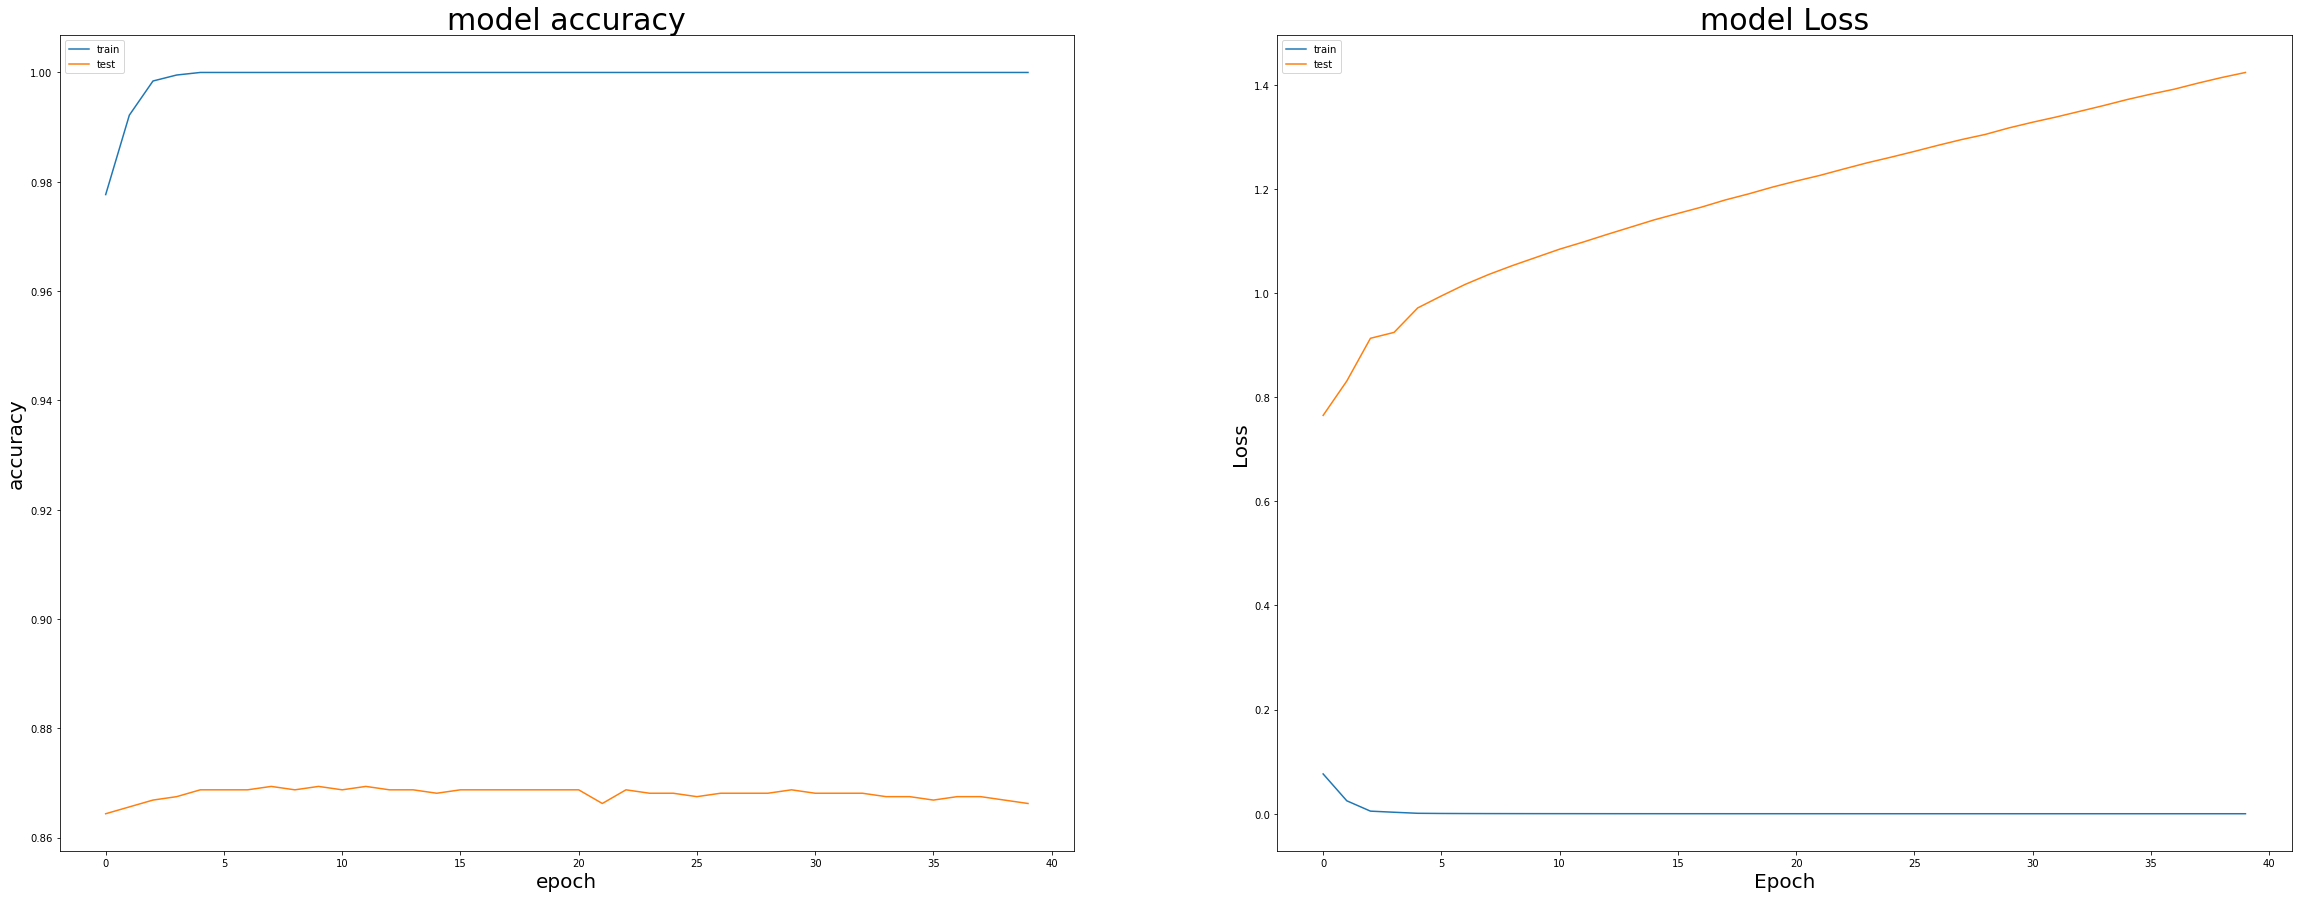

In [111]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_text.history['accuracy'])
axs[0].plot(history_text.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_text.history['loss'])
axs[1].plot(history_text.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### The Simpler model

In [104]:
len(X_text_train[0])

12

In [112]:
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim=text_sent_length))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ohp_simpler_history = model_ohp_simpler.fit(X_text_train, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40


200/200 [==============================] - 2s 4ms/step - loss: 15.8568 - accuracy: 0.6211 - val_loss: 9.2374 - val_accuracy: 0.6037
Epoch 2/40
200/200 [==============================] - 1s 3ms/step - loss: 7.2883 - accuracy: 0.6372 - val_loss: 6.1194 - val_accuracy: 0.6100
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 5.3553 - accuracy: 0.6400 - val_loss: 4.8610 - val_accuracy: 0.6500
Epoch 4/40
200/200 [==============================] - 1s 3ms/step - loss: 4.5996 - accuracy: 0.6411 - val_loss: 5.0816 - val_accuracy: 0.6562
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 4.2997 - accuracy: 0.6388 - val_loss: 4.2708 - val_accuracy: 0.6394
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 4.0872 - accuracy: 0.6417 - val_loss: 4.9509 - val_accuracy: 0.6350
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 3.9057 - accuracy: 0.6420 - val_loss: 5.2665 - val_accuracy: 0.5800
Epoch 8/40
200/2

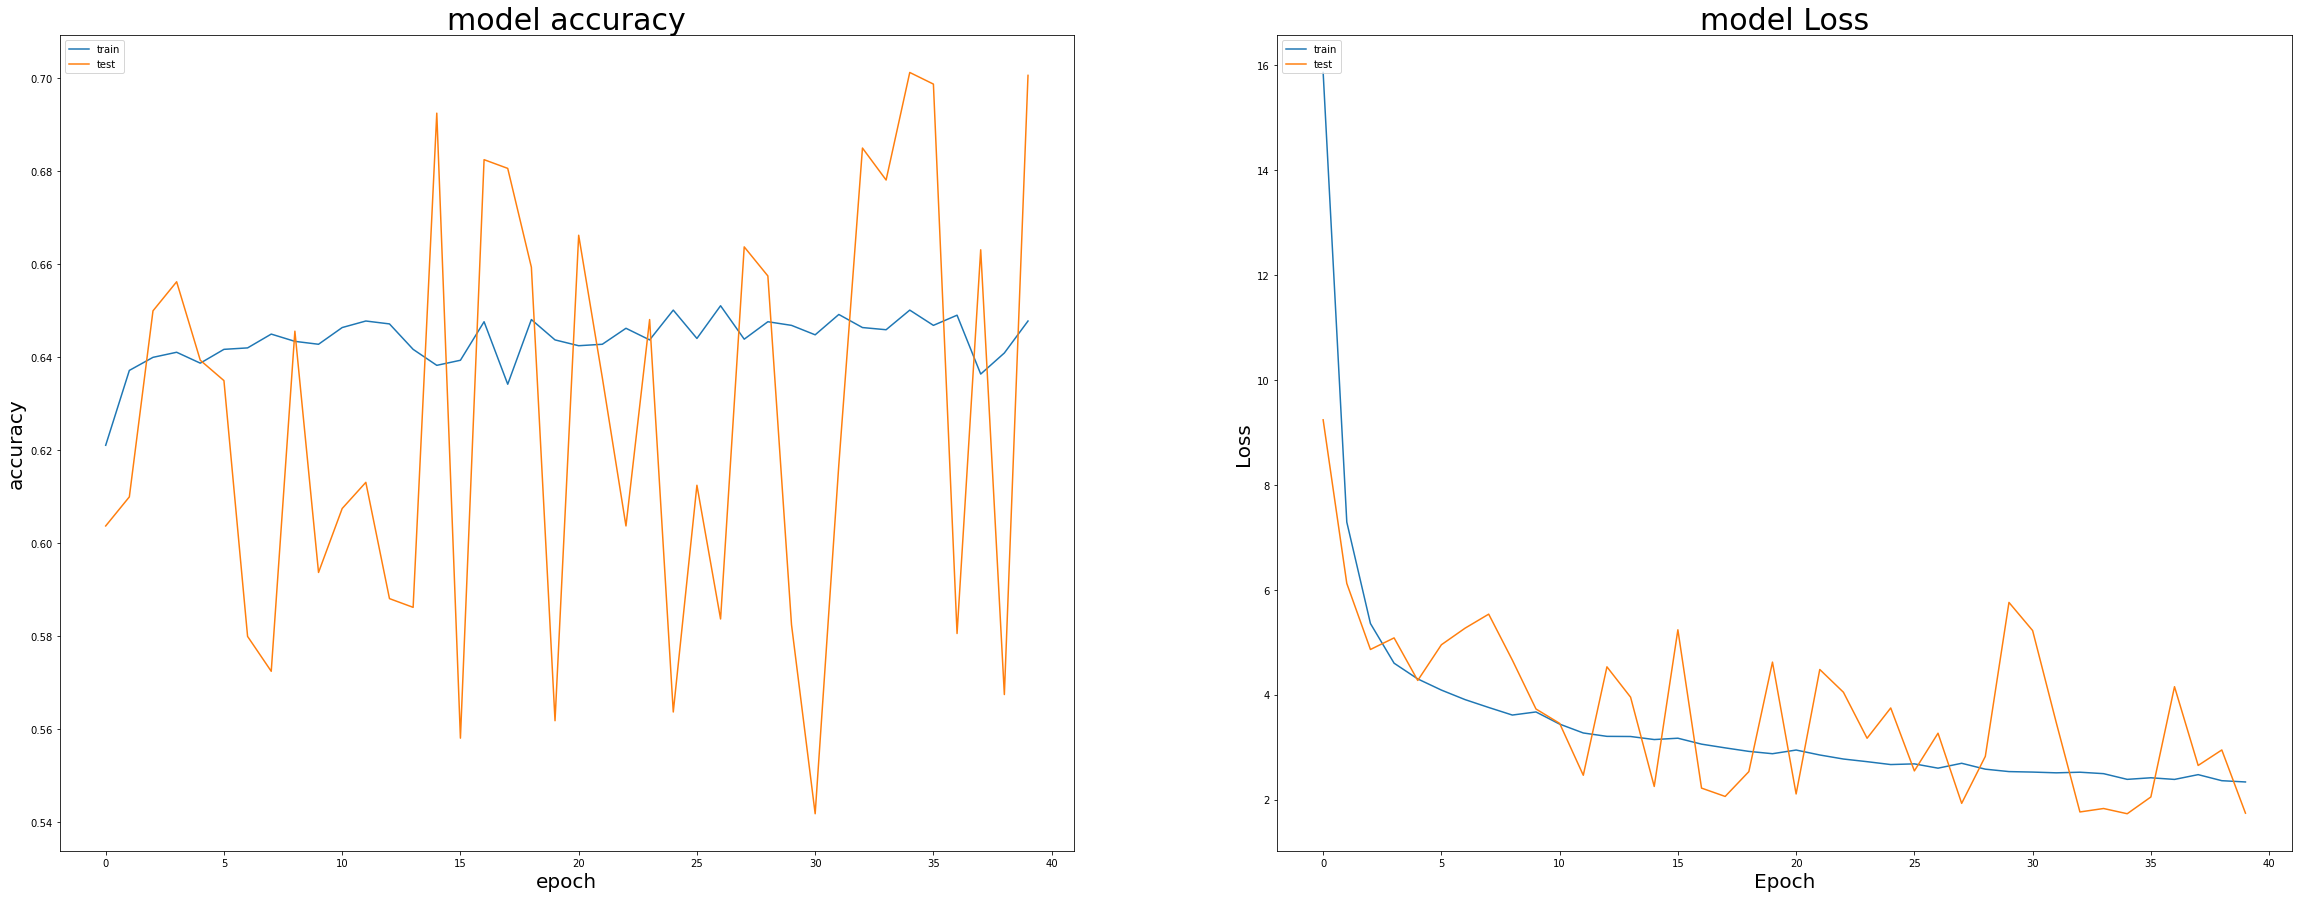

In [113]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_ohp_simpler_history.history['accuracy'])
axs[0].plot(model_ohp_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_ohp_simpler_history.history['loss'])
axs[1].plot(model_ohp_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

### Vectorização de palavras

X_title_tokens = np.array(news_df_preprocessed['title_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title_tokens, y, train_size=0.8, random_state=SEED)

In [150]:
X_text_tokens = np.array(news_df_preprocessed['text_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_text_train, X_text_test, y_text_train , y_text_test = train_test_split(X_text_tokens, y, train_size=0.8, random_state=SEED)

In [152]:
X_train = labelizeTweets(X_text_train, 'TRAIN')
X_test = labelizeTweets(X_text_test, 'TEST')
train_words = [x.words for x in tqdm(X_text_train)]

8000it [00:00, 256459.81it/s]
2001it [00:00, 326428.47it/s]


AttributeError: 'list' object has no attribute 'words'

In [145]:
#build word vocab and vectorization
N_DIM = 100
train_words = [x.words for x in tqdm(X_text_train)]
news_w2v = Word2Vec(vector_size=N_DIM, min_count=10,window=5, workers=4)
news_w2v.build_vocab(train_words)
news_w2v.train(train_words, total_words=news_w2v.corpus_total_words, epochs=50)

100%|██████████| 8000/8000 [00:00<00:00, 1446685.87it/s]


(2570890, 3826250)

## Sofisticated Model

In [160]:
VO_SIZE= len(list(vocab.keys()))
EMBEDDING_VECTOR_FEATURE_TEXT=100
model_text_sofisticated = Sequential()
model_text_sofisticated.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TEXT, name='text_embedding'))
model_text_sofisticated.add(LSTM(100))
model_text_sofisticated.add( Dense(1, activation='sigmoid'))
model_text_sofisticated.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_text_sofisticated.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_embedding (Embedding)  (None, None, 100)         155500    
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 236,001
Trainable params: 236,001
Non-trainable params: 0
_________________________________________________________________
None


In [161]:
X_text_train = labelizeTweets(X_text_train, 'TRAIN')
X_text_test = labelizeTweets(X_text_test, 'TEST')
train_words = [x.words for x in tqdm(X_train)]

8000it [00:00, 348577.64it/s]
2001it [00:00, 500375.74it/s]
100%|██████████| 8000/8000 [00:00<00:00, 795543.46it/s]


In [162]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [163]:
train_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_text_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_text_test))])
test_vecs_w2v = scale(test_vecs_w2v)



vocab = news_w2v.wv.key_to_index

train_vecs_w2v2 = np.array([ np.int64(v + VO_SIZE - VO_GAP) for v in train_vecs_w2v])

0it [00:00, ?it/s]

8000it [00:00, 17279.71it/s]
2001it [00:00, 18239.08it/s]


In [164]:
model_text_sofisticated_history = model_text_sofisticated.fit(train_vecs_w2v2, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40


200/200 [==============================] - 27s 120ms/step - loss: 0.6635 - accuracy: 0.6067 - val_loss: 0.6494 - val_accuracy: 0.6194
Epoch 2/40
200/200 [==============================] - 23s 113ms/step - loss: 0.6375 - accuracy: 0.6406 - val_loss: 0.6306 - val_accuracy: 0.6500
Epoch 3/40
200/200 [==============================] - 25s 125ms/step - loss: 0.5854 - accuracy: 0.6898 - val_loss: 0.5421 - val_accuracy: 0.7163
Epoch 4/40
200/200 [==============================] - 23s 116ms/step - loss: 0.5625 - accuracy: 0.7013 - val_loss: 0.5618 - val_accuracy: 0.7144
Epoch 5/40
200/200 [==============================] - 22s 112ms/step - loss: 0.5622 - accuracy: 0.6986 - val_loss: 0.5373 - val_accuracy: 0.7306
Epoch 6/40
200/200 [==============================] - 26s 129ms/step - loss: 0.5579 - accuracy: 0.7027 - val_loss: 0.5424 - val_accuracy: 0.7206
Epoch 7/40
200/200 [==============================] - 22s 109ms/step - loss: 0.5457 - accuracy: 0.7148 - val_loss: 0.5291 - val_accuracy: 0.7

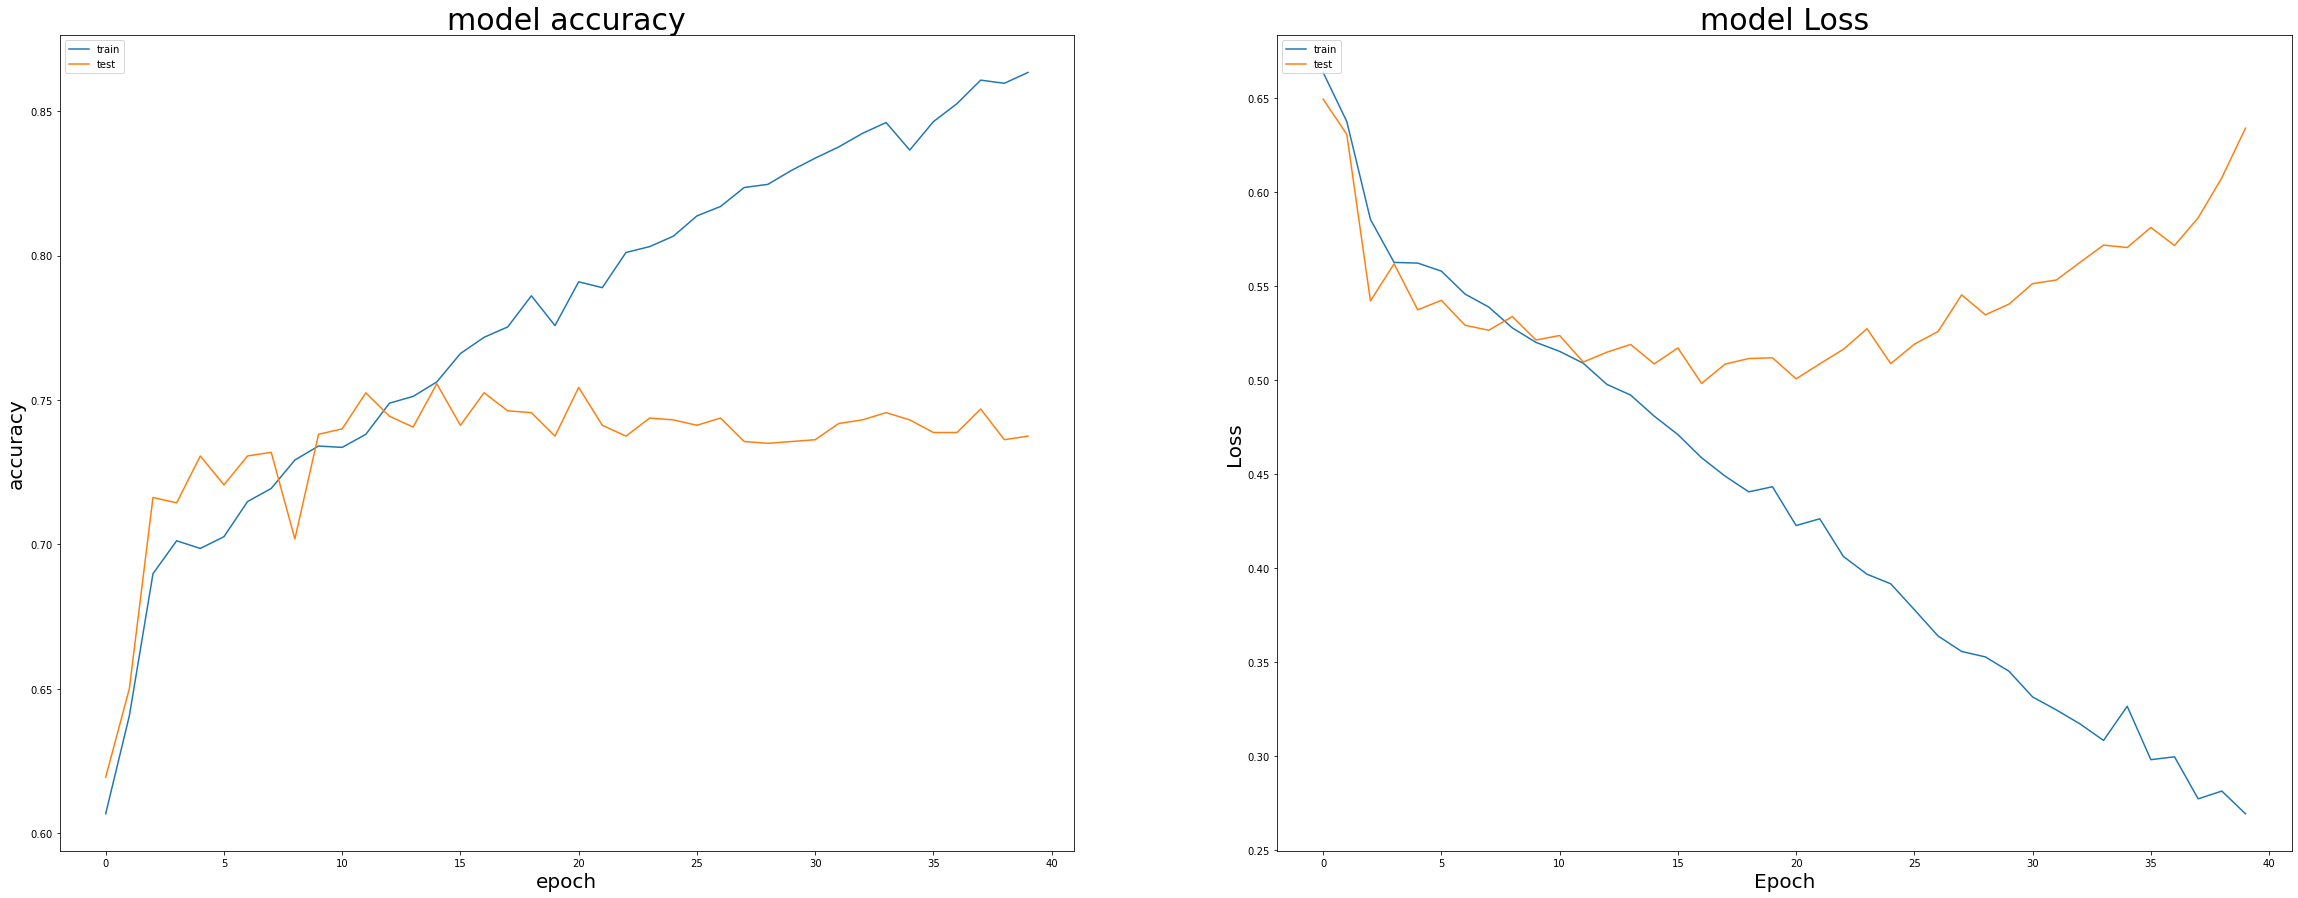

In [165]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_text_sofisticated_history.history['accuracy'])
axs[0].plot(model_text_sofisticated_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_text_sofisticated_history.history['loss'])
axs[1].plot(model_text_sofisticated_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### Com o modelo mais simples

In [166]:
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim=N_DIM))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ohp_simpler_history = model_ohp_simpler.fit(train_vecs_w2v2, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 1s 4ms/step - loss: 121.4139 - accuracy: 0.5048 - val_loss: 45.0098 - val_accuracy: 0.5306
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 108.0009 - accuracy: 0.4995 - val_loss: 39.7190 - val_accuracy: 0.4694
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 100.3471 - accuracy: 0.4975 - val_loss: 130.4521 - val_accuracy: 0.5306
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 93.5803 - accuracy: 0.4944 - val_loss: 42.0366 - val_accuracy: 0.4694
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 88.5841 - accuracy: 0.4908 - val_loss: 164.5296 - val_accuracy: 0.5306
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 81.9627 - accuracy: 0.5084 - val_loss: 62.9379 - val_accuracy: 0.4694
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 76.6981 - accuracy: 0.5011 - val_loss: 68.3727 - val_accu

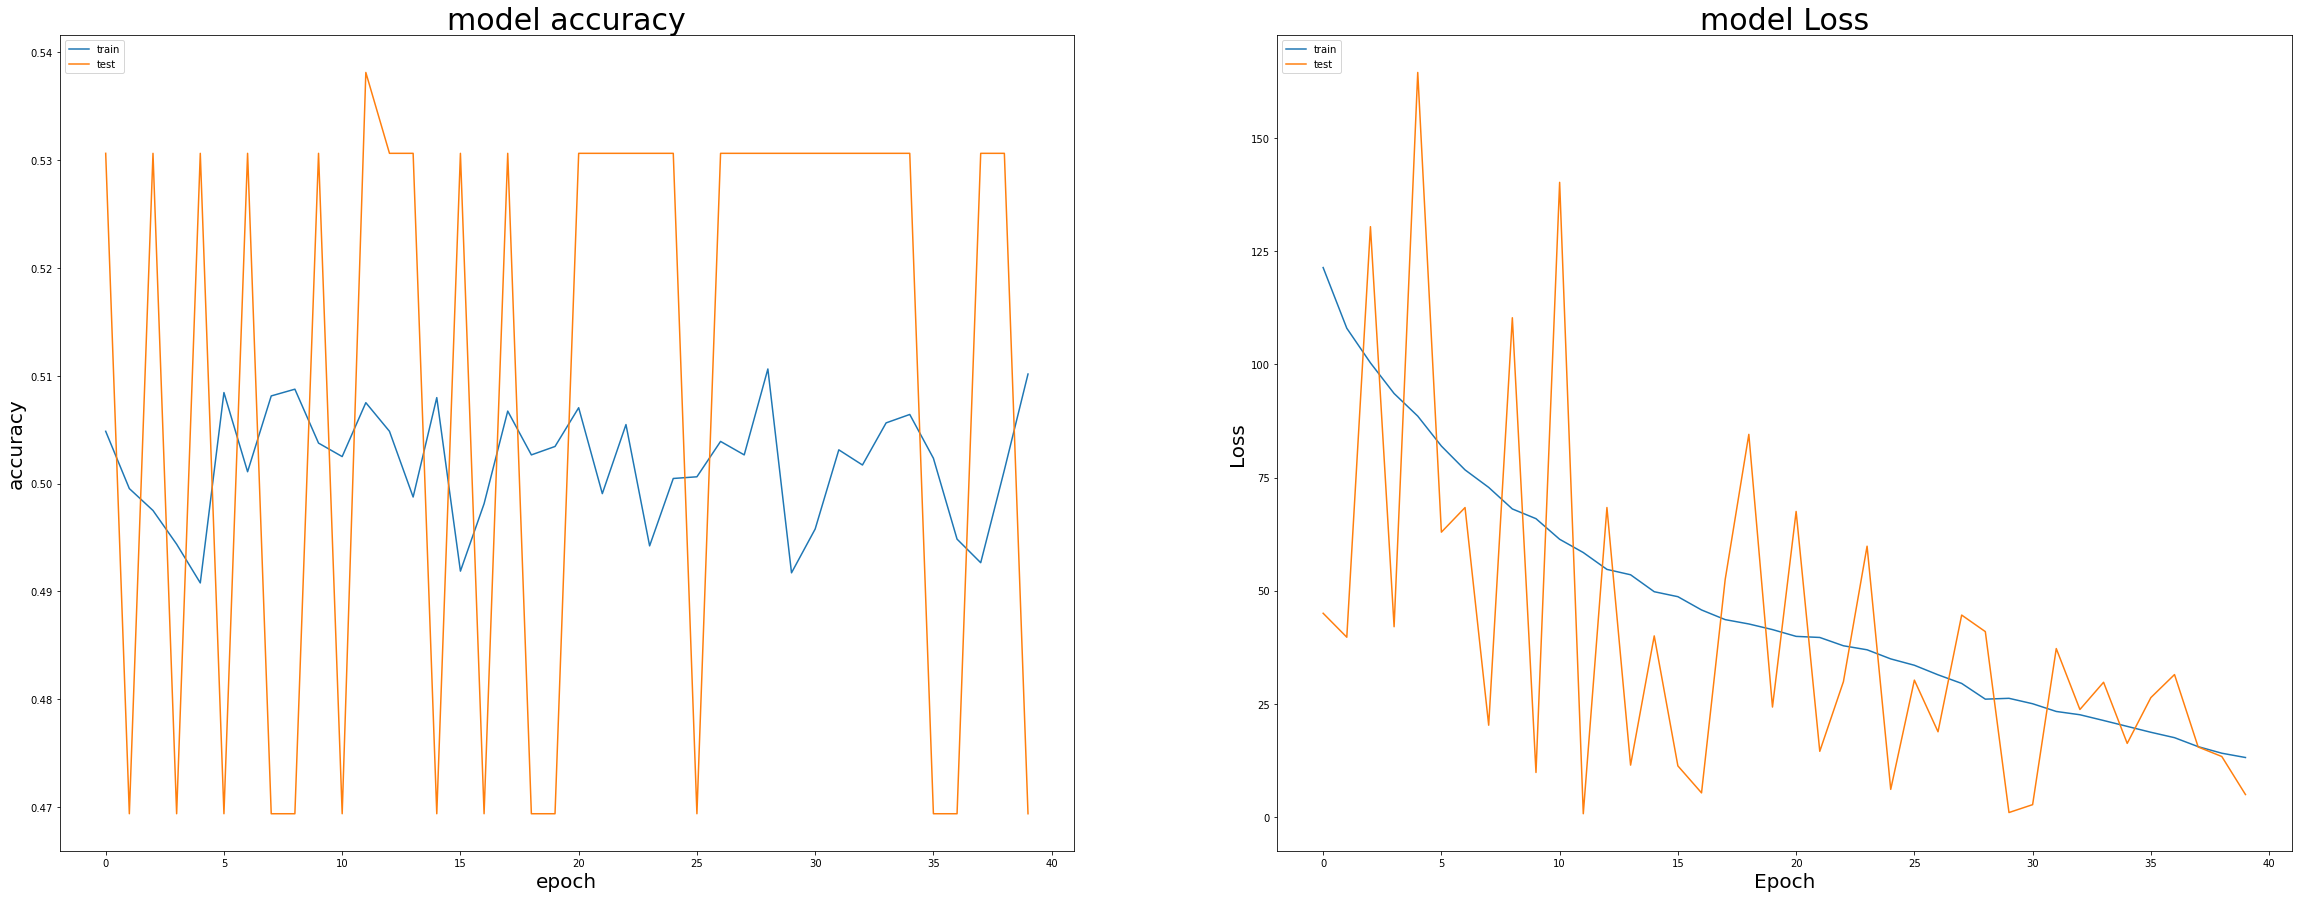

In [167]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_ohp_simpler_history.history['accuracy'])
axs[0].plot(model_ohp_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_ohp_simpler_history.history['loss'])
axs[1].plot(model_ohp_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

o modelo mais simple é simples demais e está apresentando um comportamento de um modelo underfitting, alta variância. Já o modelo mais complexo fica overfitting depois de algumas poucas épocas. Porém ele performa melhor